In [22]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
from math import exp

(24, 3)


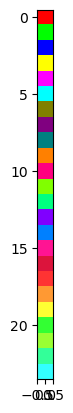

In [23]:
# training input 24 colours


inputRGB = np.array([
[255,0,0],
[0,255,0],
[0,0,255],
[255,255,0],
[255,0,255],
[0,255,255],
[128,128,0],
[128,0,128],
[0,128,128],
[255,128,0],
[255,0,128],
[128,255,0],
[0,255,128],
[128,0,255],
[0,128,255],
[255,20,147],
[220,20,60],
[255,51,51],
[255,153,51],
[255,255,51],
[51,255,51],
[153,255,51],
[51,255,153],
[51,255,255]])

# calibrate colour codes between 0 and 1

calibratedRGB = inputRGB/255

# inspect
plt.imshow(np.reshape(calibratedRGB,(calibratedRGB.shape[0],1,3)))
print(calibratedRGB.shape)


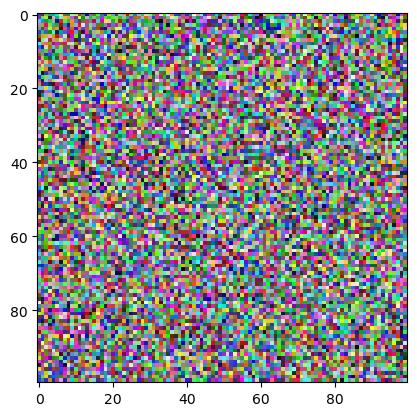

In [24]:
# Initialize the system
space_size = 100 # 100 x 100 grid of neurons
alpha_0 = 0.8
# Nc = 20
max_epochs = 1000

sigma_0 = 20
# 1
# check with a larger sigma_0 as well maybe 20?

# Initialize random weights
w = np.random.random((space_size,space_size,3))
# print(w.shape)
plt.imshow(w)

In [25]:
# helper functions

def a_time_varying_learning_rate(x_current_training_epoch, total_epocs, a_0):
    return a_0*exp(-x_current_training_epoch/total_epocs)

def sigma(x_current_training_epoch, total_epocs, sigma_0):
    return sigma_0*exp(-x_current_training_epoch/total_epocs)

def euclid_distance(p1, p2):
    return np.linalg.norm(p1 - p2, axis =2)

# def dist_i_j(i, j):
#     xi, xj = np.unravel_index(i, shape)

def neighbourhood_i_j(x_current_epoch, total_epochs, dij, sigma_0):
    sigma_dij = sigma(x_current_epoch, total_epochs, sigma_0)
    return exp(-dij*dij/(2*sigma_dij*sigma_dij))





Epoch: 20


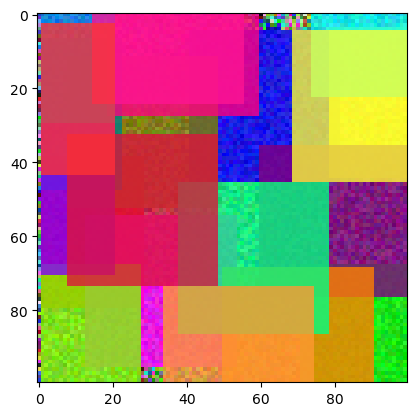

Epoch: 40


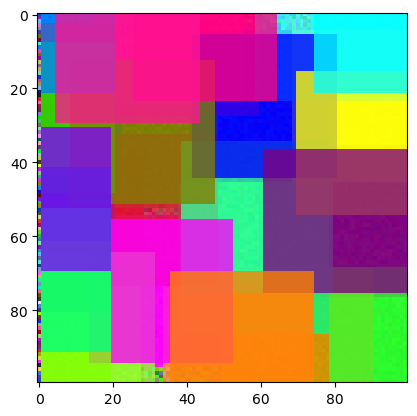

Epoch: 100


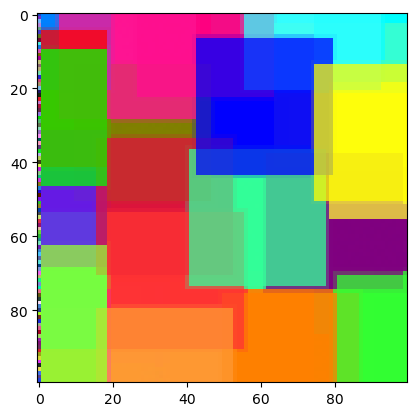

Epoch: 1000


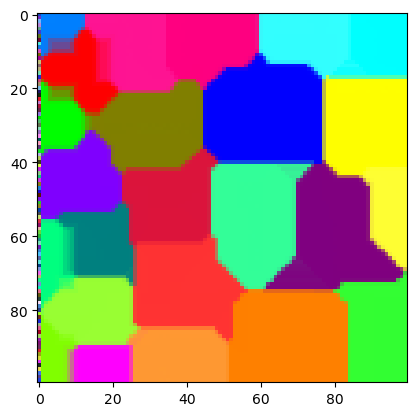

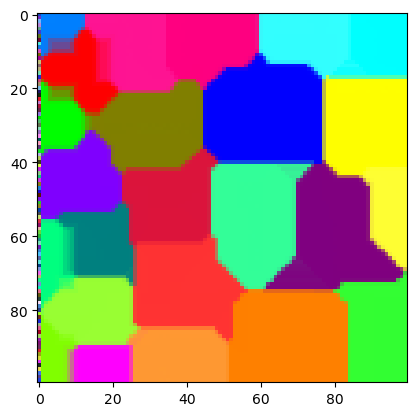

In [26]:
# main loop
current_epoch = 1
alpha = alpha_0
sigma_x = sigma_0

while current_epoch <= max_epochs:

    for node_x in calibratedRGB:

        # calculate distance
        dist = euclid_distance(node_x, w)

        # find winning node
        ind = np.unravel_index(np.argmin(dist, axis=None), dist.shape)

        # print(ind)
        # print("current epoch", current_epoch)
        # print("sigma_x", sigma_x)

        # update weights for the neighbourhood
        for i in range(ind[0]-sigma_x, ind[0]+sigma_x+1):
            for j in range(ind[1]-sigma_x, ind[1]+sigma_x+1):
                if i >=0 and j >0 and i < space_size and j < space_size:
                    #  do not exceed space limits
                    w[i][j] += alpha *(node_x-w[i][j])
        
        # decay learning rate
        alpha = a_time_varying_learning_rate(current_epoch, max_epochs, alpha_0)

        # adjust neighbourhood
        # sigma_x = neighbourhood_i_j(current_epoch, max_epochs, dist, sigma_0)
        sigma_x = round(sigma(current_epoch, max_epochs, sigma_0))


        som_grids  = [20, 40, 100, 1000]
        if current_epoch in som_grids:
            print("Epoch:", current_epoch)
            plt.imshow(w)
            display.display(plt.gcf())

        current_epoch +=1



        